## Выполнили Полянчиков Влад, Ле Конг Тхань, Коневских Роман

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
print('_'*124)

____________________________________________________________________________________________________________________________


### Sample Sub

In [4]:
sample_sub = pd.read_csv('sample_submission.csv')
print(sample_sub.shape)
sample_sub.head()

(1459, 2)


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
print('_'*124)

____________________________________________________________________________________________________________________________


### Training

In [6]:
training = pd.read_csv('train.csv')
traindex = training.Id
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(training.shape)
print('*' * 30)
print(training.info())
print('*' * 30)
print(training.describe())
print('*' * 30)
print(training.duplicated().sum())
print('*' * 30)

(1460, 81)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 n

In [8]:
training.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
...,...,...
76,CentralAir,0
77,SaleCondition,0
78,Heating,0
79,TotalBsmtSF,0


In [9]:
training.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [10]:
training.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [11]:
y = training['SalePrice']
training = training.drop('SalePrice', axis=1)

In [12]:
print('_'*124)

____________________________________________________________________________________________________________________________


In [13]:
testing = pd.read_csv('test.csv')
testdex = testing.Id
testing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
print(testing.shape)
print('*' * 30)
print(testing.info())
print('*' * 30)
print(testing.describe())
print('*' * 30)
print(testing.duplicated().sum())
print('*' * 30)

(1459, 80)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 

In [15]:
print('_'*124)

____________________________________________________________________________________________________________________________


### Training + Testing Preprocessing

In [16]:
# нужно заполнить нулевые значения

In [17]:
df = pd.concat([training, testing])

In [18]:
print(df.shape)
df.head()

(2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df['ExterQual'] = df['ExterQual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1})

df['PoolQC'] = df['PoolQC'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1, 'NA': 0})

df['GarageCond'] = df['GarageCond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1, 'NA': 0})

df['GarageQual'] = df['GarageQual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1, 'NA': 0})

df['FireplaceQu'] = df['FireplaceQu'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1, 'NA': 0})

df['KitchenQual'] = df['KitchenQual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1})

df['HeatingQC'] = df['HeatingQC'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1})

df['BsmtFinType2'] = df['BsmtFinType2'].map({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' :3, 'LwQ' :2, 'Unf': 1, 'NA': 0})

df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' :3, 'LwQ' :2, 'Unf': 1, 'NA': 0})

df['BsmtCond'] = df['BsmtCond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1})

df['BsmtQual'] = df['BsmtQual'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1})


df['ExterCond'] = df['ExterCond'].map({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' :2, 'Po' :1})
df['Street'] = df['Street'].map({'Grvl' : 2, 'Pave' : 1})
df['Alley'] = df['Alley'].map({'Grvl' : 2, 'Pave' : 1, 'NA' : 0})
df['LotShape'] = df['LotShape'].map({'Reg' : 3, 'IR1' : 2, 'IR2' : 1, 'IR3' : 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' :1, 'NA' :0})
df['Functional'] = df['Functional'].map({'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' :5, 'Maj1' :4, 'Maj2': 3, 'Sev': 2, 'Sal': 1})
df['GarageFinish'] = df['GarageFinish'].map({'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NA' :0})
df['PavedDrive'] = df['PavedDrive'].map({'Y' : 2, 'P' : 1, 'N' : 0})
df['Fence'] = df['Fence'].map({'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' :1, 'NA' :0})

In [21]:
df.isnull().sum().reset_index().sort_values(ascending=False, by=0)

,index,0
72,PoolQC,2909
74,MiscFeature,2814
6,Alley,2721
73,Fence,2348
57,FireplaceQu,1420
...,...,...
41,CentralAir,0
43,1stFlrSF,0
44,2ndFlrSF,0
45,LowQualFinSF,0


In [22]:
df.sample(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
223,1684,60,RL,63.0,10928,1,NaN,3,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
33,1494,60,RL,85.0,13143,1,NaN,2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
249,250,50,RL,NaN,159000,1,NaN,1,Low,AllPub,...,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal
1169,2630,60,RL,63.0,12292,1,NaN,2,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial
1253,2714,160,FV,24.0,2544,1,1.0,3,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
916,2377,20,RL,94.0,17778,1,NaN,2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
898,2359,160,RL,50.0,8012,1,NaN,3,Lvl,AllPub,...,0,0,NaN,3.0,NaN,0,7,2007,WD,Normal
1433,1434,60,RL,93.0,10261,1,NaN,2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1149,1150,70,RM,50.0,9000,1,NaN,3,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1049,1050,20,RL,60.0,11100,1,NaN,3,Low,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml


In [23]:
categorical =['MSSubClass',
 'MSZoning', 
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
    'CentralAir',
 'Neighborhood',
    'GarageYrBlt', 
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
              'YearBuilt', 'YearRemodAdd', 
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType', 
              'Foundation', 
              'Heating',
              'Electrical', 
               'GarageType',
              'MoSold', 'YrSold',
     'MiscFeature', 'SaleType','SaleCondition']

graded =['Street',
 'Alley','LotShape', 'OverallQual',
 'OverallCond','Functional',
         'ExterQual', 'ExterCond', 'PoolQC', 'GarageFinish',
         'GarageCond', 'GarageQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
         'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 
         'Fence','BsmtExposure', 'PavedDrive' ]

non_categorical =['MasVnrArea',
                  'LotFrontage',
                  'LotArea', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF', 'LowQualFinSF','GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
    'MiscVal']

In [24]:
#Проверка (без Id и SalePrice должно получиться 79)
len(categorical) +len(graded) + len(non_categorical)

78

In [25]:
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col].astype(str))


In [26]:
for_scale = df[non_categorical]
graded_columns = df[graded]
categorical_columns = df[categorical]

In [27]:
categorical_columns.fillna('Unknown', inplace=True)

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [28]:
for_scale.fillna(0, inplace=True)
graded_columns.fillna(0, inplace=True)

In [29]:
graded_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 22 columns):
Street          2919 non-null int64
Alley           2919 non-null float64
LotShape        2919 non-null int64
OverallQual     2919 non-null int64
OverallCond     2919 non-null int64
Functional      2919 non-null float64
ExterQual       2919 non-null int64
ExterCond       2919 non-null int64
PoolQC          2919 non-null float64
GarageFinish    2919 non-null float64
GarageCond      2919 non-null float64
GarageQual      2919 non-null float64
FireplaceQu     2919 non-null float64
KitchenQual     2919 non-null float64
HeatingQC       2919 non-null int64
BsmtFinType2    2919 non-null float64
BsmtFinType1    2919 non-null float64
BsmtCond        2919 non-null float64
BsmtQual        2919 non-null float64
Fence           2919 non-null float64
BsmtExposure    2919 non-null float64
PavedDrive      2919 non-null int64
dtypes: float64(14), int64(8)
memory usage: 524.5 KB


In [30]:
for_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 27 columns):
MasVnrArea       2919 non-null float64
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
BsmtFinSF2       2919 non-null float64
BsmtUnfSF        2919 non-null float64
TotalBsmtSF      2919 non-null float64
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
LowQualFinSF     2919 non-null int64
GrLivArea        2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
FullBath         2919 non-null int64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null int64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-null int64
Fireplaces       2919 non-null int64
GarageCars       2919 non-null float64
GarageArea       2919 non-null float64
WoodDeckSF       2919 non-null int64
OpenPorchSF      2919 non-null int64
EnclosedPorch    2919 non-null int64
3SsnPorch        2919 no

In [31]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 29 columns):
MSSubClass       2919 non-null int32
MSZoning         2919 non-null int32
LandContour      2919 non-null int32
Utilities        2919 non-null int32
LotConfig        2919 non-null int32
LandSlope        2919 non-null int32
CentralAir       2919 non-null int32
Neighborhood     2919 non-null int32
GarageYrBlt      2919 non-null int32
Condition1       2919 non-null int32
Condition2       2919 non-null int32
BldgType         2919 non-null int32
HouseStyle       2919 non-null int32
YearBuilt        2919 non-null int32
YearRemodAdd     2919 non-null int32
RoofStyle        2919 non-null int32
RoofMatl         2919 non-null int32
Exterior1st      2919 non-null int32
Exterior2nd      2919 non-null int32
MasVnrType       2919 non-null int32
Foundation       2919 non-null int32
Heating          2919 non-null int32
Electrical       2919 non-null int32
GarageType       2919 non-null int32
MoSol

In [32]:
from sklearn.preprocessing import StandardScaler
for_scale_names = for_scale.columns
sc = StandardScaler()

In [33]:
for_scale = sc.fit_transform(for_scale)
for_scale = pd.DataFrame(for_scale, columns = for_scale_names)

In [34]:
graded_columns.shape

(2919, 22)

In [35]:
df_filtered = for_scale.join(graded_columns)
df_filtered = df_filtered.join(categorical_columns)

In [36]:
df_filtered.fillna(0, inplace=True)

In [37]:
df_filtered.sample(10)

,MasVnrArea,LotFrontage,LotArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,MasVnrType,Foundation,Heating,Electrical,GarageType,MoSold,YrSold,MiscFeature,SaleType,SaleCondition
845,-0.567016,-1.725621,0.821605,-0.293025,-1.275450,0.767683,1.380131,-0.785025,-0.101197,0.395759,...,3.0,2.0,1.0,4.0,1.0,7.0,1.0,4.0,8.0,4.0
1362,-0.567016,-1.725621,0.297361,-0.293025,0.351341,-0.762773,0.309508,0.281168,-0.101197,0.468887,...,2.0,0.0,1.0,4.0,5.0,3.0,0.0,4.0,8.0,4.0
999,-0.432806,0.186203,-0.431939,-0.293025,-0.135558,0.307413,0.123423,-0.785025,-0.101197,-0.578618,...,2.0,0.0,1.0,4.0,5.0,5.0,1.0,4.0,8.0,4.0
849,1.446137,0.664158,-0.072044,-0.293025,-0.074127,-1.186766,-0.167175,0.990407,-0.101197,0.700129,...,1.0,1.0,1.0,4.0,1.0,10.0,1.0,4.0,8.0,4.0
1249,-0.567016,0.066714,-0.376395,0.274518,-0.715743,-0.397731,-0.437379,-0.785025,-0.101197,-1.013431,...,2.0,1.0,1.0,4.0,1.0,7.0,1.0,4.0,8.0,4.0
373,-0.567016,0.634286,0.059080,0.771118,-1.275450,-1.005379,0.406374,-0.785025,-0.101197,-0.359234,...,2.0,2.0,1.0,4.0,1.0,2.0,3.0,4.0,8.0,4.0
1163,-0.567016,0.066714,0.346438,-0.293025,-1.275450,0.332353,0.250878,-0.785025,-0.101197,-0.479796,...,1.0,2.0,1.0,4.0,1.0,7.0,0.0,4.0,6.0,5.0
1250,-0.567016,1.052497,0.125784,-0.293025,1.102168,2.400170,2.422714,-0.785025,-0.101197,1.204117,...,2.0,1.0,1.0,4.0,1.0,6.0,4.0,4.0,8.0,4.0
975,-0.567016,-1.725621,-0.953266,-0.293025,-1.202642,-0.858002,-1.240347,0.869090,-0.101197,-0.234720,...,2.0,2.0,1.0,4.0,5.0,6.0,0.0,4.0,8.0,4.0
1173,-0.567016,2.396748,0.996987,2.479660,0.947452,1.239290,1.214439,1.480343,10.224554,3.133106,...,2.0,1.0,1.0,4.0,6.0,5.0,1.0,4.0,8.0,4.0


In [38]:
df_filtered.isna().sum().reset_index().sort_values(ascending=False, by=0)[0:10]

,index,0
0,MasVnrArea,0
49,MSSubClass,0
56,Neighborhood,0
55,CentralAir,0
54,LandSlope,0
53,LotConfig,0
52,Utilities,0
51,LandContour,0
50,MSZoning,0
48,PavedDrive,0


In [39]:
df_filtered.fillna(0, inplace=True)

In [40]:
df_filtered.shape

(7296, 78)

In [41]:
print('_'*124)

____________________________________________________________________________________________________________________________


### Preparing for training

In [42]:
X = df_filtered[:len(training)]
X_test = df_filtered[len(training):]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)

(1168, 78)
(1168,)
(292, 78)
(292,)
(5836, 78)


In [46]:
print('_'*124)

____________________________________________________________________________________________________________________________


# Modelling

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor(random_state = 42)

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
prmtrs ={'max_depth': range(1, 11), 'min_samples_split': [2, 11], 'min_samples_leaf': range(1, 11)}

In [51]:
gs = GridSearchCV(rfr, cv = 5, param_grid = prmtrs, n_jobs=-1)
gs.fit(X_train, y_train)
best_rfr = gs.best_estimator_
best_rfr

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [52]:
gs.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [53]:
best_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [54]:
best_rfr.feature_importances_

array([0. , 0.1, 0. , 0. , 0.4, 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. ])

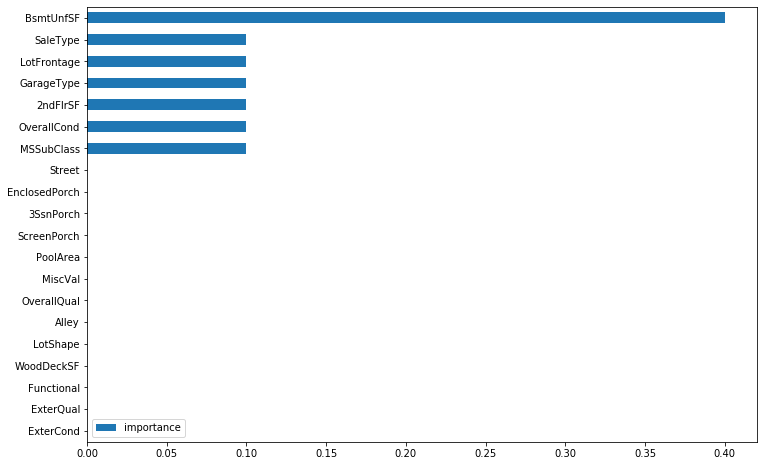

In [55]:
imp = pd.DataFrame(best_rfr.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').tail(20).plot(kind='barh', figsize=(12, 8))

In [56]:
print('_'*124)

____________________________________________________________________________________________________________________________


### Scoring and submitting

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
np.sqrt(mean_squared_error(best_rfr.predict(X_valid), y_valid))

79583.20228623308

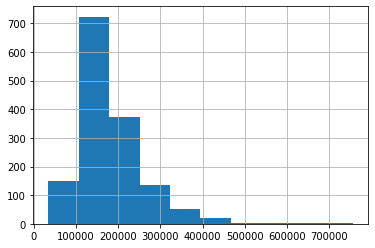

In [59]:
y.hist()

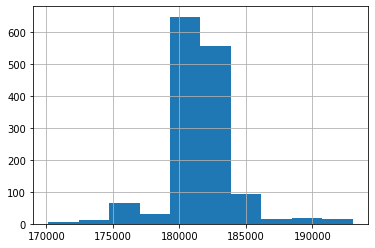

In [67]:
submission.to_csv('submission.csv', index=False)

In [68]:
df_filtered2 = df_filtered[['WoodDeckSF', 'HouseStyle', 'Neighborhood', 'GarageArea', 'BsmtUnfSF', 'LotConfig', 'ScreenPorch']]

In [69]:
X = df_filtered2[:len(training)]
X_test = df_filtered2[len(training):]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [70]:
rfr = RandomForestRegressor(random_state = 42, max_depth = 1, min_samples_leaf = 6, min_samples_split = 5)

In [71]:
rfr.fit(X_train, y_train)

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [72]:
np.sqrt(mean_squared_error(rfr.predict(X_valid), y_valid))

70545.6501992141

In [78]:
sub = rfr.predict(X_test)

sub = pd.DataFrame(sub)

submission = testdex.reset_index().join(sub)

del submission['index']
submission.columns = ['Id', 'SalePrice']

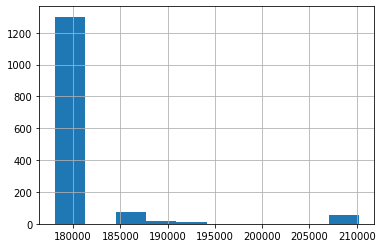

In [79]:
submission.SalePrice.hist()

In [80]:
submission.to_csv('submission.csv', index=False)

In [81]:
print('_'* 124)

____________________________________________________________________________________________________________________________


In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
knr = KNeighborsRegressor(n_neighbors = 30)

knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform')

In [75]:
np.sqrt(mean_squared_error(knr.predict(X_valid), y_valid))

74257.88910757811

In [76]:
sub = pd.DataFrame(knr.predict(X_test))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CB0936188>]],
      dtype=object)

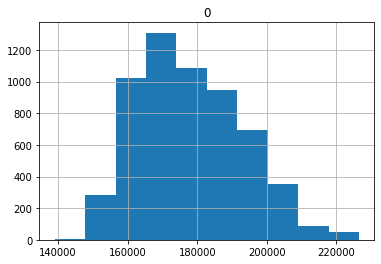

In [77]:
sub.hist()